In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

# Загрузка датасетов

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/стажки/хакатон/submission.csv')
submission.head()

,ego_id,u,v,x1
0,8,0,93,0.000000
1,8,0,143,0.000000
2,8,0,151,1.606742
3,8,1,24,0.026496
4,8,5,4,0.159857


In [ ]:
submission.shape, submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810976 entries, 0 to 810975
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ego_id  810976 non-null  int64  
 1   u       810976 non-null  int64  
 2   v       810976 non-null  int64  
 3   x1      810976 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 24.7 MB


((810976, 4), None)

Описание данных:

Эго-вершина (вершина, связанная со всеми
остальными) имеет ID 0. У каждого пользователя  не более 300 смежных вершин в эго-графе. На каждом ребре
указан момент появления связи между пользователями t — целое число дней, прошедшее с возникновения дружбы между
каждой парой пользователей (-1, если дружбы нет). На части вершин будут также указаны коэффициенты активности
взаимодействия. Чем они больше, тем взаимодействие между пользователями в этой паре интенсивнее.


```ego_id``` - айди графа\
```u, v ``` - пользователи соц сети вк\
пара пользователей u и v встречается в датасете ровно столько раз, сколько у них общих друзей;\


In [ ]:
submission.isnull().sum(), submission.dtypes

(ego_id    0
 u         0
 v         0
 x1        0
 dtype: int64,
 ego_id      int64
 u           int64
 v           int64
 x1        float64
 dtype: object)

Все данные преобразованы к числовому формату, а также датасет не содержит пустых значений => не требует очистки 

In [ ]:
submission.describe()

,ego_id,u,v,x1
count,8.109760e+05,810976.000000,810976.000000,810976.000000
mean,8.630946e+11,87.519290,94.702012,0.626121
std,4.924002e+11,69.711472,73.811816,0.904527
min,8.000000e+00,0.000000,0.000000,0.000000
25%,4.466766e+11,30.000000,34.000000,0.000002
50%,8.675834e+11,73.000000,79.000000,0.294832
75%,1.288490e+12,133.000000,143.000000,0.902494
max,1.709397e+12,299.000000,299.000000,18.577640


Ознакомимся более подробно с данными

In [ ]:
uniq_counts = pd.DataFrame(
    {
        'ego_id': len(submission['ego_id'].unique()),
        'u': len(submission['u'].unique()),
        'v': len(submission['v'].unique()),
        'x1': len(submission['x1'].unique()),
    }, index = ['value counts']
)
uniq_counts

,ego_id,u,v,x1
value counts,20586,300,300,604602


Нет ни одного столбца, содержащего исключительно уникальные значения. Проверим датасет на наличие дубликатов

In [ ]:
submission.duplicated().sum()

0

Дубликатов тоже не имеется

Исследуем каждый из столбцов

In [ ]:
u_val_count = submission['u'].value_counts()
u_val_count

0      51266
16      5551
17      5518
20      5482
11      5468
       ...  
295      157
296      146
297      102
298       80
299       45
Name: u, Length: 300, dtype: int64

<Axes: xlabel='u', ylabel='Count'>

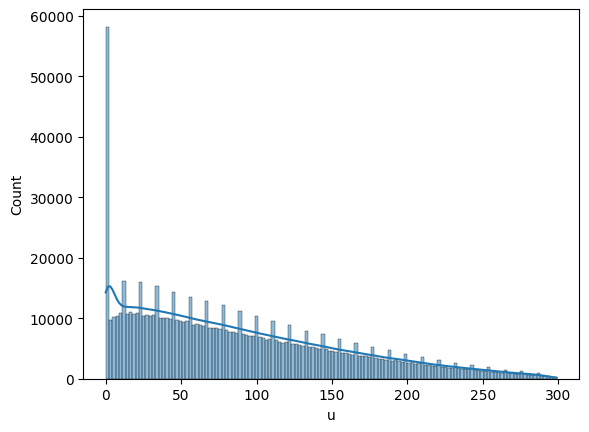

In [ ]:
sns.histplot(submission['u'], kde = True)

По графику видно, что имеется 1 выброс, при значении $ u = 0 $, то есть чаще всего поле $ u $ принимает значение $ 0 $


<Axes: >

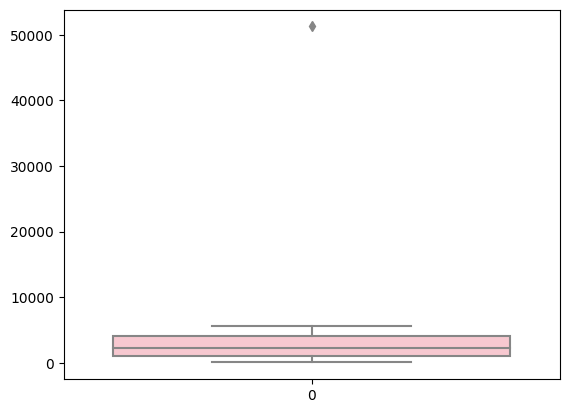

In [ ]:
sns.boxplot(u_val_count, color = 'pink')

Аналогично посмотрим для переменной $ v $

In [ ]:
v_val_count = submission['v'].value_counts()
v_val_count

0      40833
16      5187
17      5150
21      5149
12      5138
       ...  
293      537
298      531
291      523
289      519
292      509
Name: v, Length: 300, dtype: int64

<Axes: xlabel='v', ylabel='Count'>

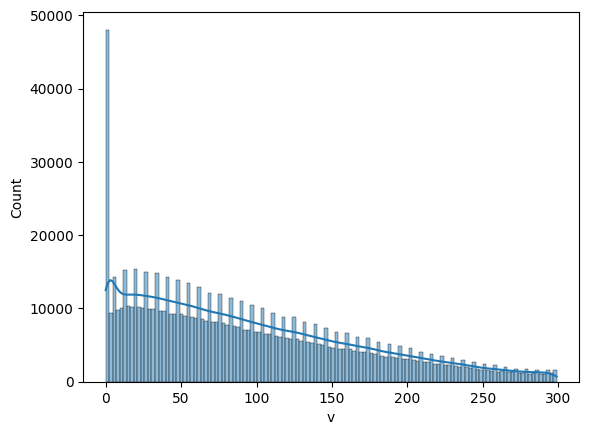

In [ ]:
sns.histplot(submission['v'], kde = True)

<Axes: >

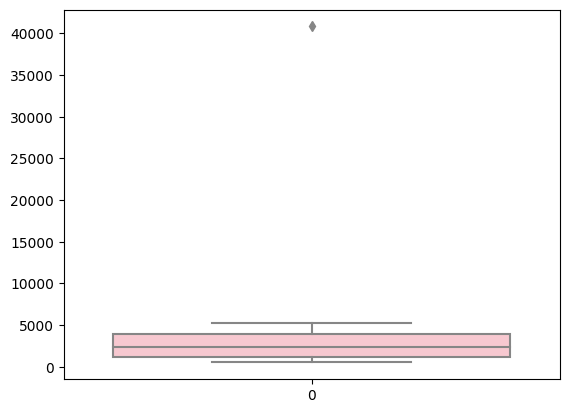

In [ ]:
sns.boxplot(v_val_count, color = 'pink')

По полю $ v $ можно сделать аналогичные выводы

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/стажки/хакатон/test.csv')
test.head()

,ego_id,u,v,t,x1,x2,x3
0,8,20,19,185.7,3.839089e-04,0.0,0.0
1,8,131,125,161.4,4.034464e-01,0.0,0.0
2,8,73,56,127.0,8.554643e-05,0.0,0.0
3,8,0,4,594.5,2.886418e-01,0.0,0.0
4,8,63,73,127.0,4.281692e-07,0.0,0.0


```u, v ``` - пользователи соц сети вк\
пара пользователей u и v встречается в датасете ровно столько раз, сколько у них общих друзей;\
```t``` — целое число дней, прошедшее с возникновения дружбы между каждой парой пользователей (-1, если дружбы нет).

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40548780 entries, 0 to 40548779
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ego_id  int64  
 1   u       int64  
 2   v       int64  
 3   t       float64
 4   x1      float64
 5   x2      float64
 6   x3      float64
dtypes: float64(4), int64(3)
memory usage: 2.1 GB


In [ ]:
test.shape

(40548780, 7)

In [ ]:
test.isnull().sum()

ego_id          0
u               0
v               0
t         6247722
x1        8109756
x2              0
x3              0
dtype: int64

In [ ]:
test.agg(['sum', 'min', 'max'])

,ego_id,u,v,t,x1,x2,x3
sum,-1896542883950291101,3552416130,3838660606,3.921425e+09,2.262505e+07,8.154625e+06,6244718.0
min,8,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,1709396984676,299,299,5.945000e+02,3.243133e+01,1.044433e+01,1.0


In [ ]:
test_u_values = test['u'].value_counts()

In [ ]:
test_v_values = test['v'].value_counts()

<Axes: >

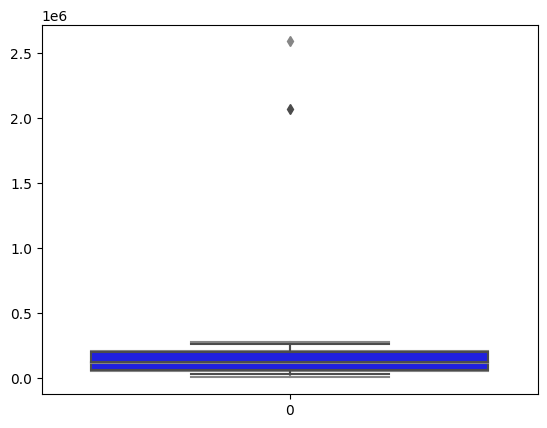

In [ ]:
sns.boxplot(test_u_values, color = 'pink')
sns.boxplot(test_v_values, color = 'blue')

(None, None)

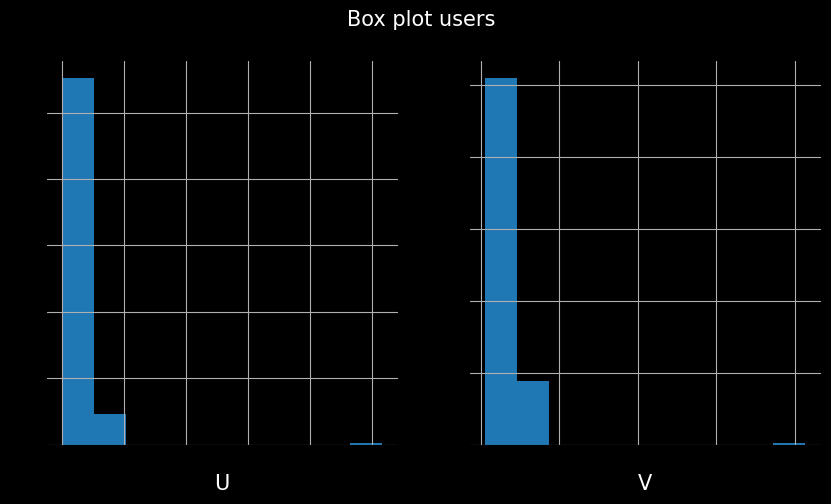

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.set_facecolor('black')
ax[0].set_facecolor('black')
ax[1].set_facecolor('black')

ax0 = ax[0].hist(test_u_values)
ax1 = ax[1].hist(test_v_values)

fig.suptitle('Box plot users', size =15, color = 'white')
ax[0].set_xlabel('U', color = 'white', size = 15)
ax[1].set_xlabel('V', color = 'white', size = 15)

ax[0].grid(), ax[1].grid()

По обоим пстроенным графикам можно увидеть, что значения u и v очень схожи, что не странно, учитывая, что суть заключается в поиске общего 

In [ ]:
set1 = test[['u', 'v']]
group_set1 = set1.groupby(['u'])
group_set1.first()

,v
u,
0,4
1,12
2,13
3,28
4,7
...,...
295,0
296,77
297,294
